In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import manifold
from sklearn.cluster import DBSCAN

In [4]:
df = pd.read_csv('sample_data/Wholesale customers data.csv')

In [5]:
df.shape

(440, 8)

In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
normalized_df = preprocessing.normalize(df)

In [10]:
tsne = manifold.TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(normalized_df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


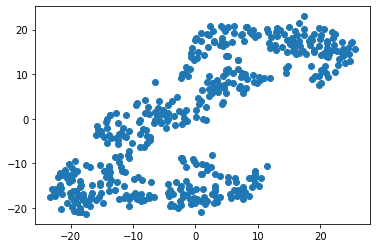

In [11]:
plt.scatter(x=df_tsne[:,0],y=df_tsne[:,1], cmap='rainbow')

In [12]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(df_tsne) # fitting the data to the object
distances,indices=nbrs.kneighbors(df_tsne) # finding the nearest neighbours

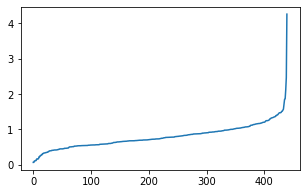

In [13]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [14]:
DBSCAN_cluster = DBSCAN(eps=1.7, min_samples=4).fit(df_tsne) 
labels = DBSCAN_cluster.labels_

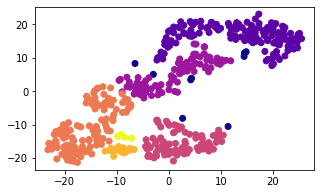

In [18]:
plt.scatter(df_tsne[:,0], df_tsne[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot

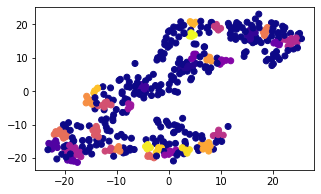

In [19]:
DBSCAN_cluster = DBSCAN(eps=1, min_samples=4).fit(df_tsne) 
labels = DBSCAN_cluster.labels_

plt.scatter(df_tsne[:,0], df_tsne[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot

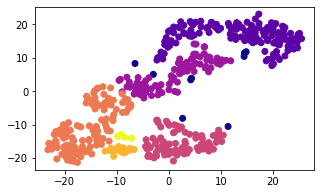

In [20]:
DBSCAN_cluster = DBSCAN(eps=2, min_samples=4).fit(df_tsne) 
labels = DBSCAN_cluster.labels_

plt.scatter(df_tsne[:,0], df_tsne[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot

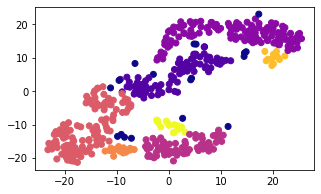

In [21]:
DBSCAN_cluster = DBSCAN(eps=2, min_samples=5).fit(df_tsne) 
labels = DBSCAN_cluster.labels_

plt.scatter(df_tsne[:,0], df_tsne[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot

استفاده از داده هایی که کاهش بعد داده نشده اند هیچ نتیحه ای نمیدهد

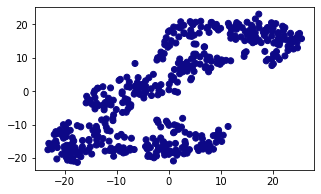

In [22]:
DBSCAN_cluster = DBSCAN(eps=4, min_samples=16).fit(normalized_df) 
labels = DBSCAN_cluster.labels_

plt.scatter(df_tsne[:,0], df_tsne[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot

# <div dir="rtl"></div>

<div dir="rtl">

اپسیلون (Eps): برای محاسبه مقدار Eps، فاصله بین هر نقطه داده تا نزدیکترین همسایه خود را با استفاده از Nearest Neighbours محاسبه می کنیم. پس از آن، آنها را مرتب می کنیم و در نهایت آنها را طرح می کنیم. از نمودار، حداکثر مقدار را در انحنای نمودار شناسایی می کنیم. این مقدار Eps ما است.

<div>

<div dir="rtl">

MinPoints: می‌توانیم حداقل تعداد امتیازهایی را که برای شناسایی یک خوشه استفاده می‌شود، به شرح زیر بدست آوریم:


اگر مجموعه داده دارای دو بعد است، از حداقل نمونه در هر خوشه به عنوان 4 استفاده کنید.


اگر داده بیش از دو بعد داشته باشد، حداقل نمونه در هر خوشه باید به صورت زیر باشد: Min_sample(MinPoints) = 2 * بعد داده
از آنجایی که داده های ما دو بعدی هستند، از مقدار پیش فرض 4 به عنوان پارامتر MinPoint خود استفاده می کنیم.

<div>

به نظر من بهترین حالت به ازای مقادیر زیر رخ میدهد

eps=1.7, min_samples=4